--- 1. Project Setup and Data Loading ---
Coca-Cola_stock_history.csv loaded successfully.

--- 2. Exploratory Data Analysis (EDA) ---

**Initial Data Inspection:**
First 5 rows of the DataFrame:
         Date      Open      High       Low     Close   Volume  Dividends  Stock Splits
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0             0
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0             0
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0             0
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0             0
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0             0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          153

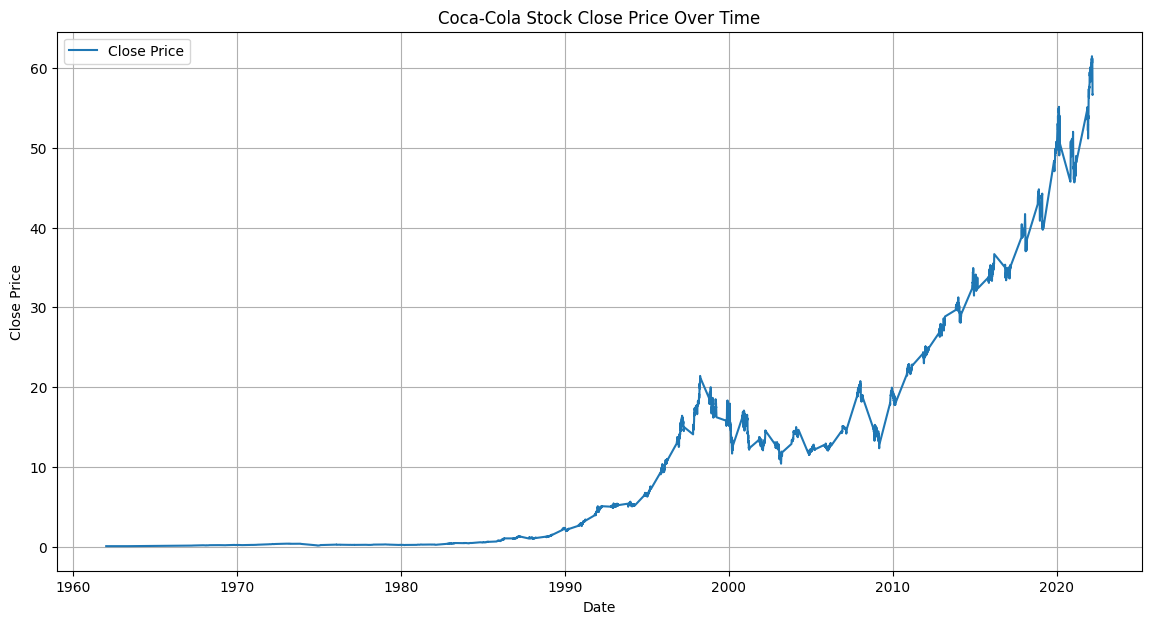

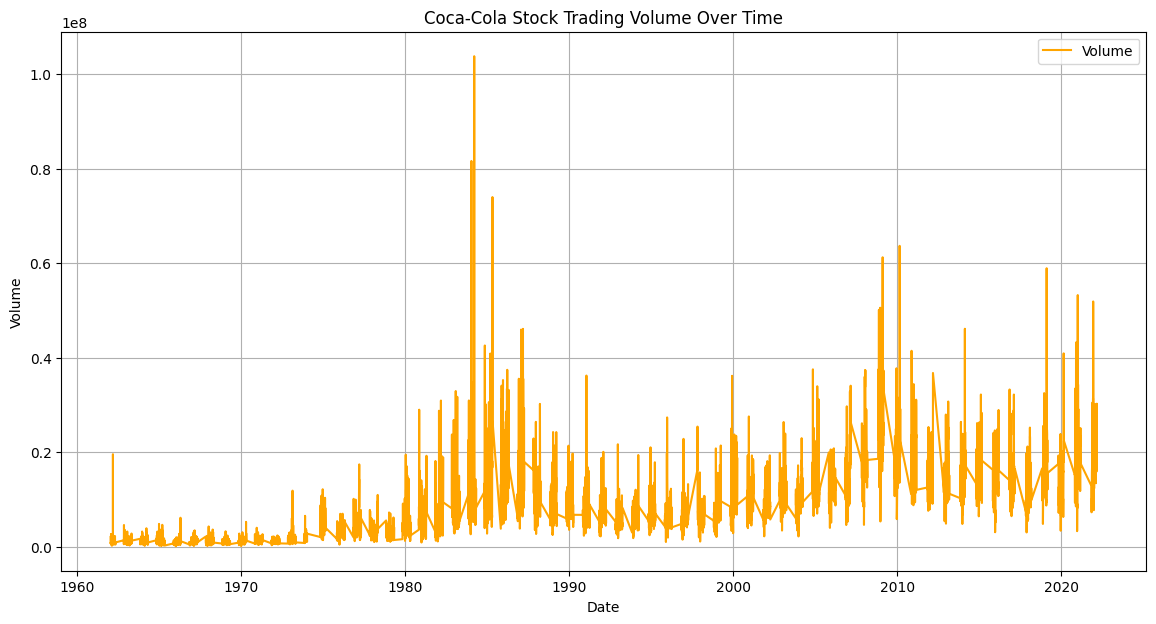

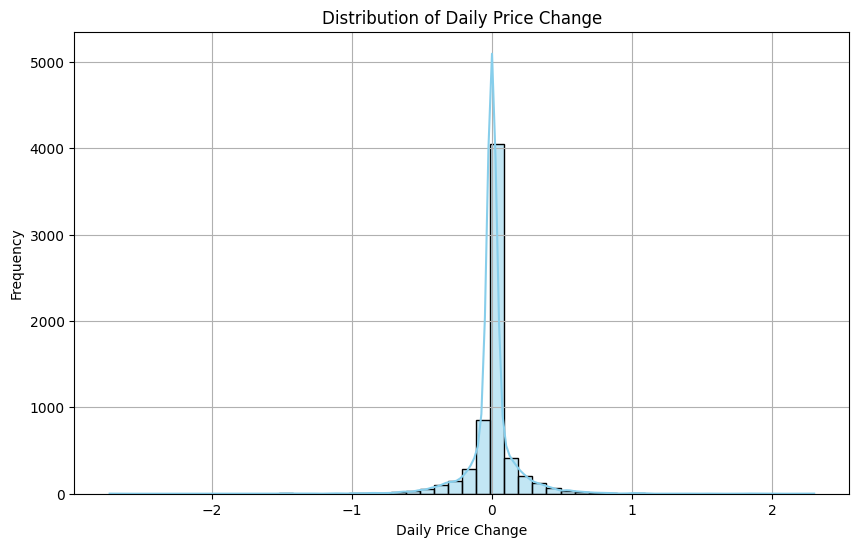

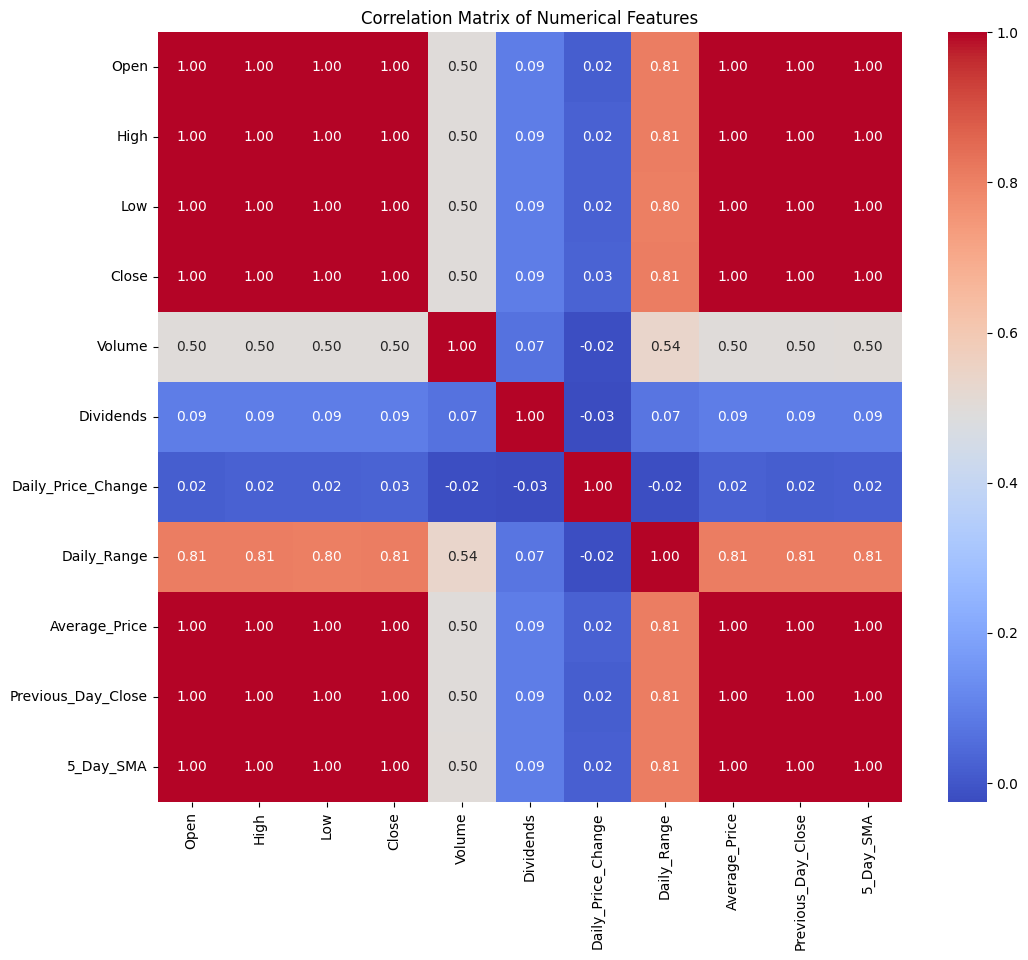


--- 7. Statistical Operations ---

Daily Volatility (Standard Deviation of Daily Returns): 0.021674
Annualized Volatility: 0.344068
Average Daily Trading Volume: 8,610,421.34
Total Dividends Paid: 8.8679

Dates with Dividend Payments:
          Date  Dividends
49  1962-03-13   0.001563
102 1962-11-28   0.001563
172 1963-03-11   0.001758
225 1963-11-26   0.001758
296 1964-03-10   0.001953

--- 8. Advanced Data Preparation (for ML Model Training) ---

DataFrame head after adding 'Target_Next_Close' and dropping last row:
        Date      Open      High       Low     Close   Volume  Dividends  Stock Splits  Daily_Price_Change  Daily_Range  Average_Price  Previous_Day_Close  5_Day_SMA  Daily_Return  Target_Next_Close
5 1962-01-09  0.047664  0.048778  0.047292  0.048530   960000        0.0             0            0.000867     0.001486       0.048066            0.047664   0.048505      0.018181           0.048778
6 1962-01-10  0.048530  0.049459  0.048035  0.048778  1612800        0.0    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# --- 1. Project Setup and Data Loading ---
print("--- 1. Project Setup and Data Loading ---")
try:
    df = pd.read_csv('Coca-Cola_stock_history.csv')
    print("Coca-Cola_stock_history.csv loaded successfully.")
except FileNotFoundError:
    print("Error: Coca-Cola_stock_history.csv not found. Please ensure the file is in the correct directory.")
    exit()

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- 2. Exploratory Data Analysis (EDA) ---")
print("\n**Initial Data Inspection:**")
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\n**Descriptive Statistics for Numerical Columns:**")
print(df.describe())

# --- 3. Data Cleaning ---
print("\n--- 3. Data Cleaning ---")
print("\n**Converting 'Date' column to datetime and removing timezone info:**")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Remove timezone information if present
df['Date'] = df['Date'].dt.tz_localize(None) if df['Date'].dt.tz is not None else df['Date']
print(df['Date'].head())

print("\n**Sorting DataFrame by 'Date':**")
df = df.sort_values(by='Date').reset_index(drop=True)
print(df.head())

# --- 4. Handling Missing Values ---
print("\n--- 4. Handling Missing Values ---")
print("\n**Checking for missing values:**")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset. No imputation needed.")
else:
    print("\nMissing values found. Applying forward fill for numerical columns.")
    # For demonstration, if there were missing values, we'd apply ffill
    # df.fillna(method='ffill', inplace=True)
    # print("\nMissing values after forward fill:")
    # print(df.isnull().sum())

# --- 5. Feature Engineering ---
print("\n--- 5. Feature Engineering ---")
df['Daily_Price_Change'] = df['Close'] - df['Open']
df['Daily_Range'] = df['High'] - df['Low']
df['Average_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['Previous_Day_Close'] = df['Close'].shift(1)
df['5_Day_SMA'] = df['Close'].rolling(window=5).mean()

print("\nNew features added. Displaying head with new columns:")
print(df.head())

# Drop rows with NaN values resulting from shifting/rolling operations (e.g., first few rows for SMA)
df.dropna(inplace=True)
print("\nDataFrame head after dropping NaN rows from feature engineering:")
print(df.head())

# --- 6. Data Visualization ---
print("\n--- 6. Data Visualization ---")

# Plotting Close Price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Coca-Cola Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Volume over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Coca-Cola Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Daily Price Change
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Price_Change'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Daily Price Change')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Daily_Price_Change', 'Daily_Range', 'Average_Price', 'Previous_Day_Close', '5_Day_SMA']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- 7. Statistical Operations ---
print("\n--- 7. Statistical Operations ---")

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility Calculation (daily)
daily_volatility = df['Daily_Return'].std()
print(f"\nDaily Volatility (Standard Deviation of Daily Returns): {daily_volatility:.6f}")

# Annualized Volatility (assuming 252 trading days)
annualized_volatility = daily_volatility * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility:.6f}")

# Average Daily Volume
average_daily_volume = df['Volume'].mean()
print(f"Average Daily Trading Volume: {average_daily_volume:,.2f}")

# Total Dividends Paid
total_dividends = df['Dividends'].sum()
print(f"Total Dividends Paid: {total_dividends:,.4f}")

# Identify dates with dividend payments
dividend_dates = df[df['Dividends'] > 0][['Date', 'Dividends']]
print("\nDates with Dividend Payments:")
print(dividend_dates.head())

# --- 8. Advanced Data Preparation (for ML Model Training) ---
print("\n--- 8. Advanced Data Preparation (for ML Model Training) ---")

# Define target variable (e.g., predicting next day's close price)
# For simplicity, let's predict the 'Close' price itself, but in a real scenario,
# you'd predict a future value or a classification (e.g., price up/down).
# Let's create a 'Target_Next_Close' for a more realistic regression example.
df['Target_Next_Close'] = df['Close'].shift(-1)

# Drop the last row as it will have NaN for 'Target_Next_Close'
df.dropna(inplace=True)

print("\nDataFrame head after adding 'Target_Next_Close' and dropping last row:")
print(df.head())

# Select features (excluding 'Date' and the direct target 'Close' if predicting 'Target_Next_Close')
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
            'Daily_Price_Change', 'Daily_Range', 'Average_Price',
            'Previous_Day_Close', '5_Day_SMA', 'Daily_Return']
target = 'Target_Next_Close'

X = df[features]
y = df[target]

# Data Splitting (chronological split)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Feature Scaling (conceptual - for an experienced developer, this would be implemented before model training)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler (conceptual step for model training).")
print("Shape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)

print("\n--- End of Data Preparation ---")
